In [ ]:
#기본적인 Library 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/2022-2 KUBIG 머신러닝 의료데이터팀/heart.csv")

In [ ]:
# DataFrame에서 제공하는 Method를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info())
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Age : Age of the patient // ** continuous variable **

Sex : Sex of the patient 

cp : Chest Pain type chest pain type // 그대로 사용 

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg) // 1) 연속형 2) 숫자 범주형 (10단위?) 3) 고혈압 유무 또는 고혈압단계 범주화 
1)이나 2) 사용할거면 standardise 할지 말지 결정하기 

chol : cholestoral in mg/dl fetched via BMI sensor // ** continuous variable **
(345 이상 drop) 

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

rest_ecg : resting electrocardiographic results // 그대로 사용

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved // 1) 그대로 (수치형) 2) 범주형 (10단위로)
맨앞이랑 맨뒤 drop (수치형일 경우) 

exang: exercise induced angina (1 = yes; 0 = no) // 그대로 

oldpeak: Previous peak // 그대로 or 2) 2mm 초과, 1~ 2mm, 1mm 미만
연속형일 경우 끝에 드랍 

slp : Slope // 범주형 

caa: number of major vessels (0-3) // 그대로 

thall : thal rate // 그대로 

target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#slope 이랑 peak랑 correlation 이 꽤나 높은데, 이거 변수 하나 삭제하든 해서 multicolinearity 해소할 방법을 찾아야할 것 같음. -> PCA쓰면 해결 될것 같기도. 
df.corr().unstack().sort_values().drop_duplicates()

oldpeak   slp        -0.577537
exng      output     -0.436757
oldpeak   output     -0.430696
thalachh  age        -0.398522
cp        exng       -0.394280
                        ...   
slp       output      0.345877
          thalachh    0.386784
thalachh  output      0.421741
output    cp          0.433798
age       age         1.000000
Length: 92, dtype: float64

In [ ]:
df.corr

<bound method DataFrame.corr of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

# 시각화

## bivariate

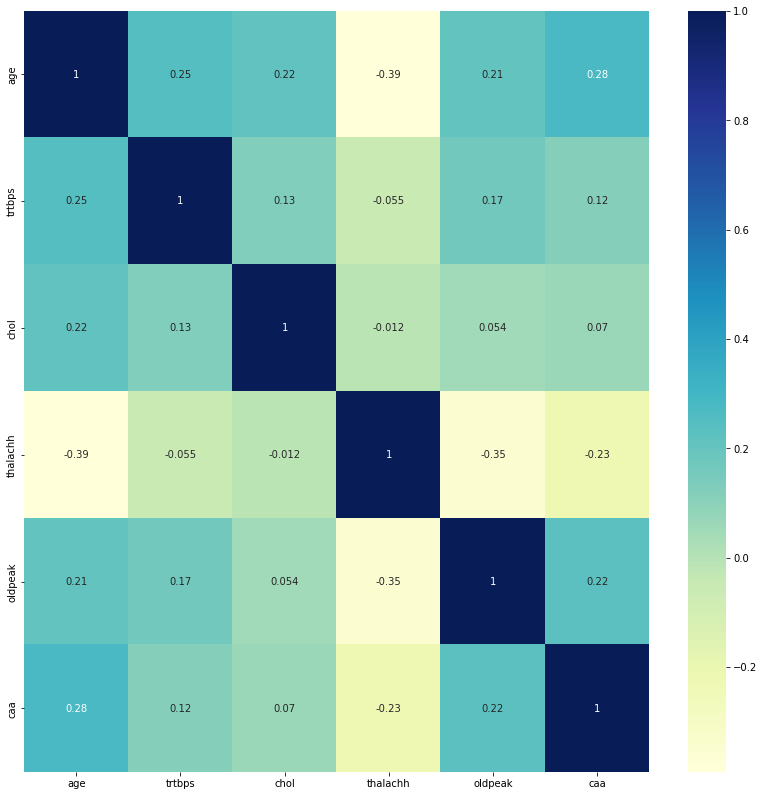

In [ ]:
# 연속형 변수간 상관관계
correlations = df[numeric_list].corr()
plt.figure(figsize = (14, 14))
sns.heatmap(correlations, annot=True, cmap='YlGnBu')



수치형 변수간 선형 상관관계가 크게 존재하지 않는다.

In [ ]:
# 모든 변수간 상관관계
# one-hot encoding 이후 범주형-수치형 변수간 상관관계 분석시 
# polyserial correlation으로 분석하는 것이 정확하다고 하지만,
# 기존 correlation plot과 수치적으로 유의미한 차이가 없기 때문에 
# one-hot encoding 전처리 이전 데이터로 correlation plot을 사용함.

#correlations = df.corr()
#plt.figure(figsize = (14, 14))
#sns.heatmap(correlations, annot=True, cmap='YlGnBu')

In [ ]:
df.corr().unstack().sort_values().drop_duplicates()

sex_0      sex_1       -1.000000
exng_1     exng_0      -1.000000
restecg_1  restecg_0   -0.973852
thall_3    thall_2     -0.872748
slp_1      slp_2       -0.869957
                          ...   
exng_0     output       0.440506
thalachh   slp_2        0.446826
cp_0       exng_1       0.472757
output     thall_2      0.532404
age        age          1.000000
Length: 351, dtype: float64

* 다중공선성 의심

oldpeak-slp, thalachh-slp, thalachh-age

 상관관계가 0.58, 0.39, 0.4 존재함. 다중공선성을 의심할 수 있음. 

다중공선성을 해결하기 위해 PCA, Ridge, LASSO등 사용가능.

* 종속변수와 독립변수간 상관관계

cp, exng, oldpeak, thalachh 각각 상관관계0.43, 0.44, 0.43, 0.42 씩 존재함.

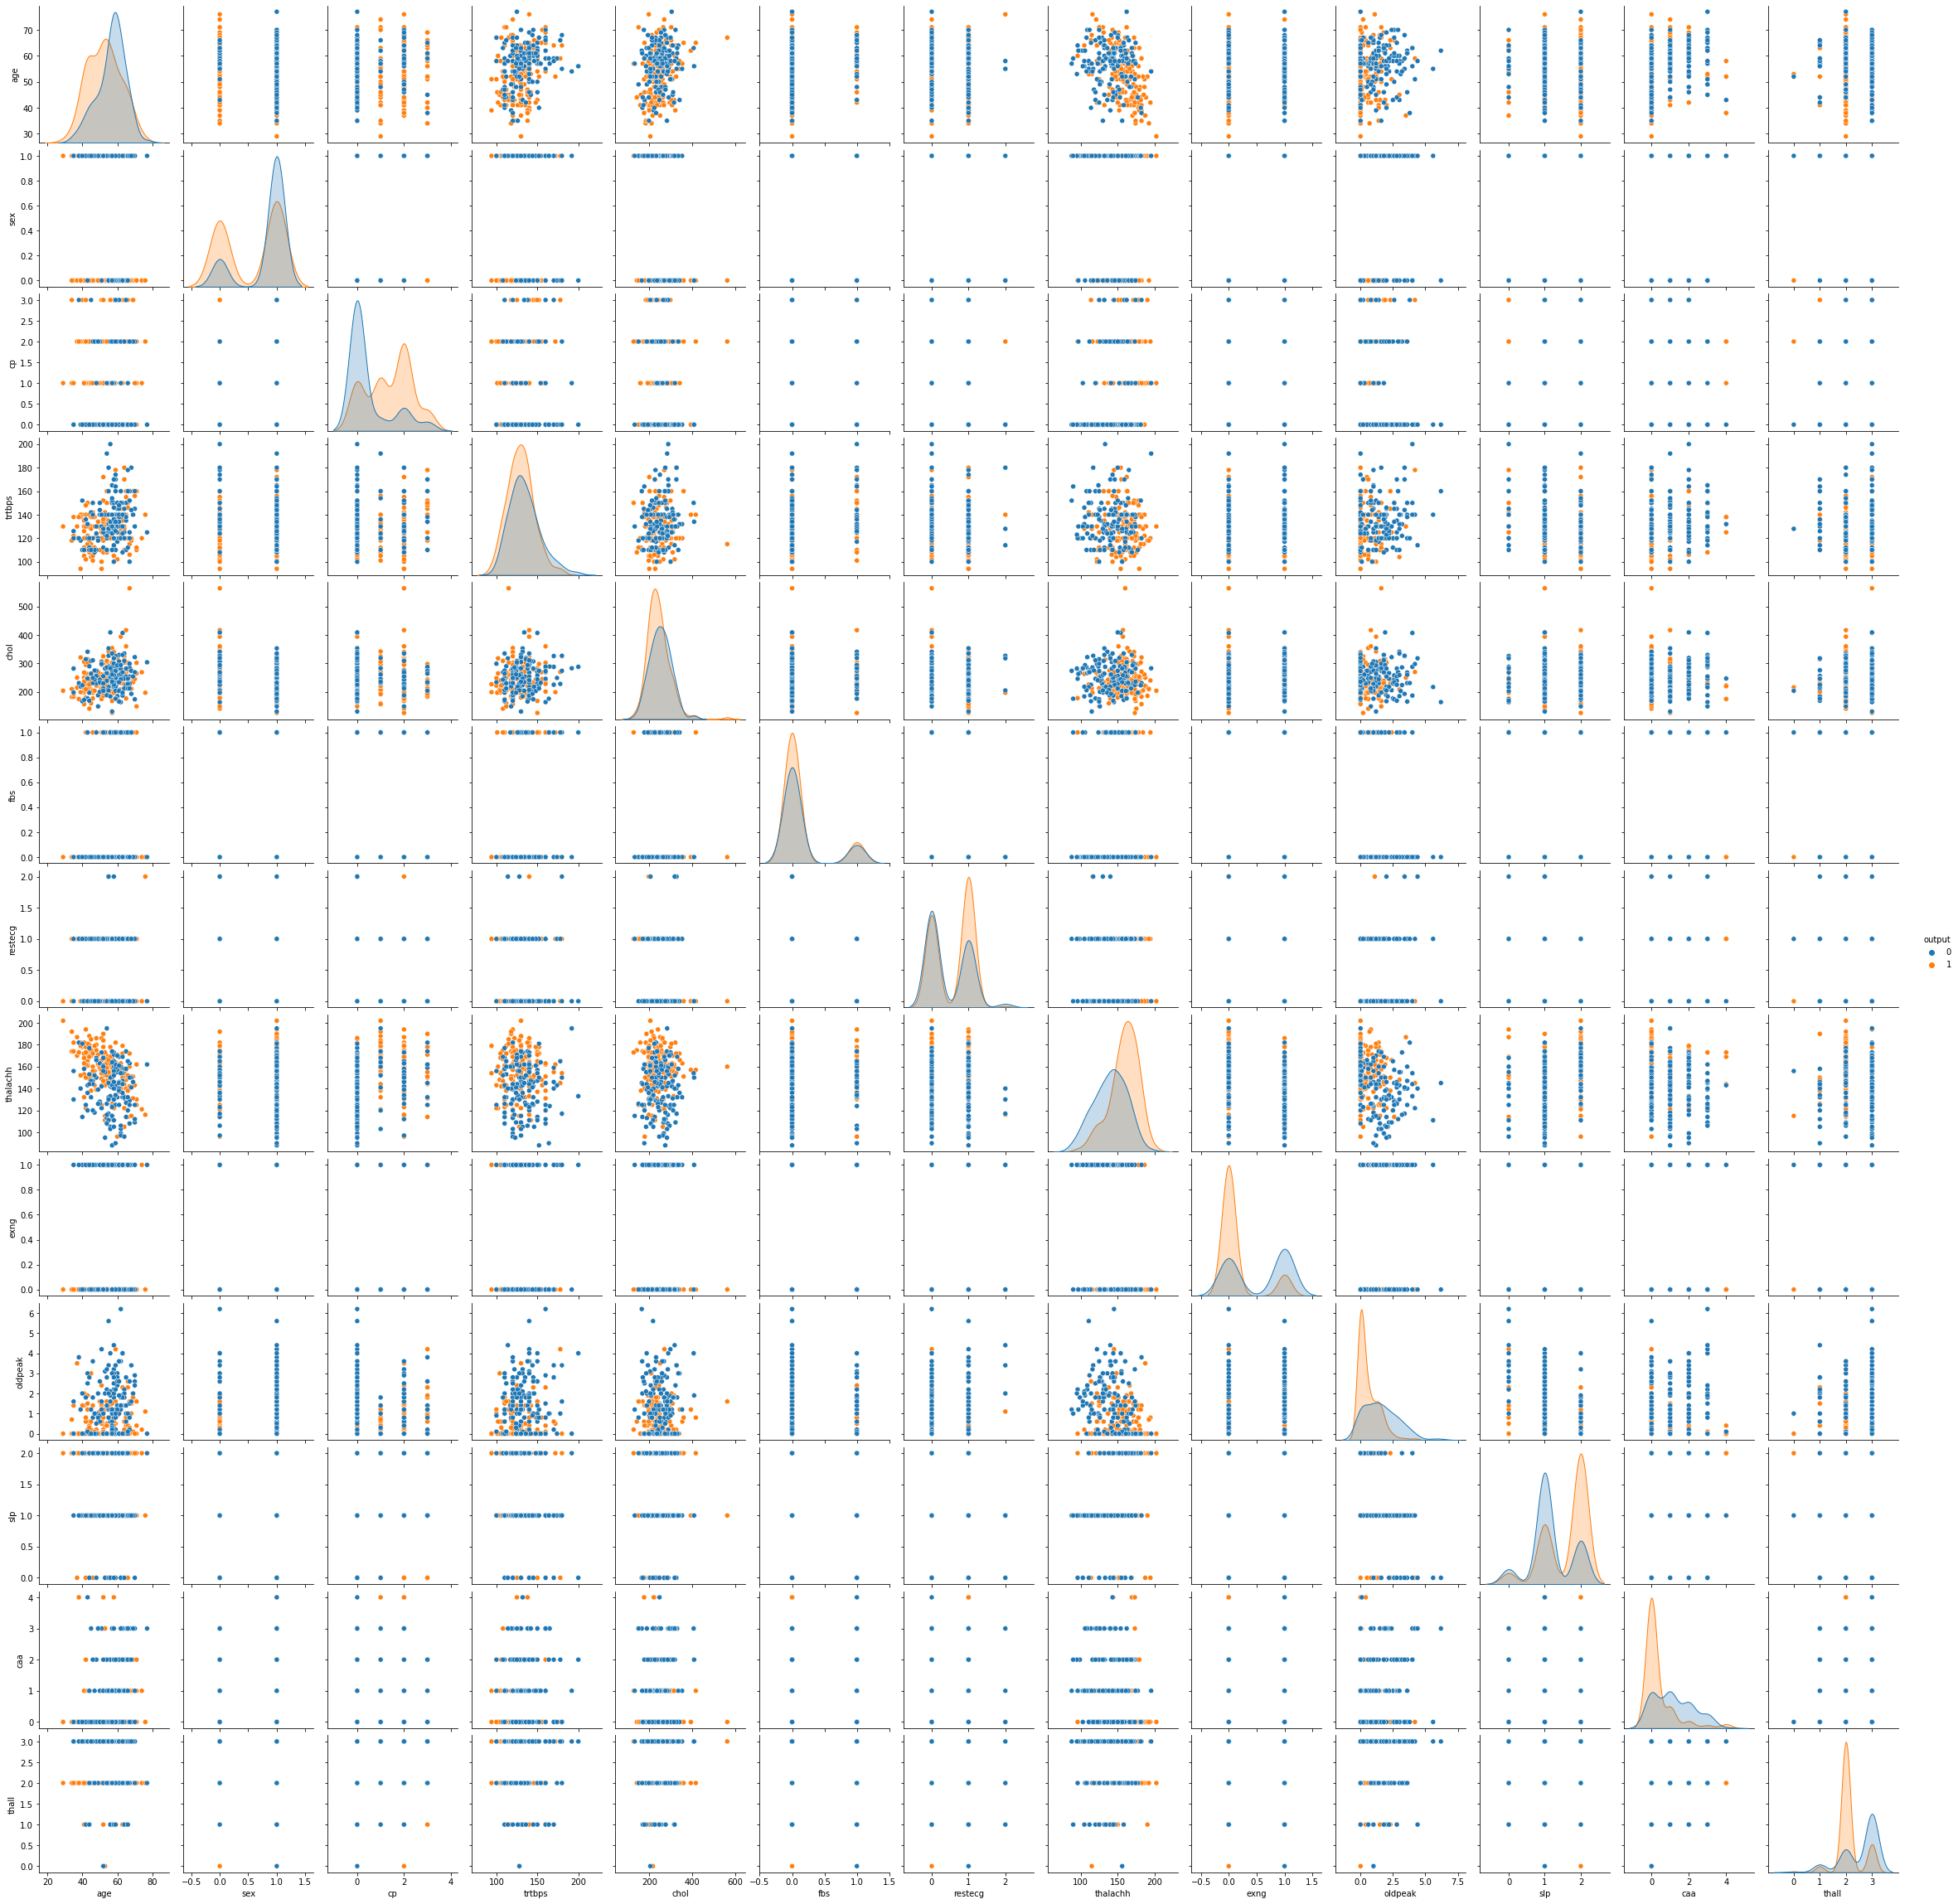

In [ ]:
sns.pairplot(df,hue='output')
plt.show()

## univariate

In [ ]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","thall"]
numeric_list = ['age', 'trtbps', 'chol','thalachh', 'oldpeak','caa']

### countplot



### 수치형 변수 histogram(distribution)

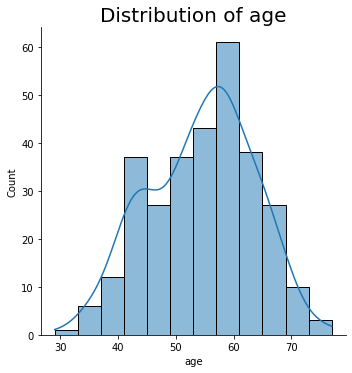

In [ ]:
sns.displot(data=df,x='age',kde=True)
plt.title("Distribution of age",fontsize=20)
plt.show()

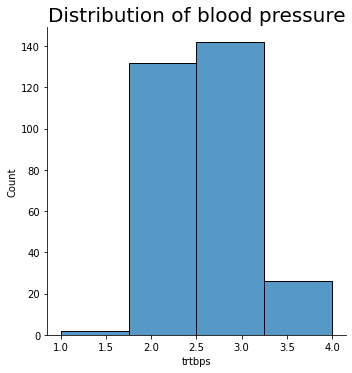

In [ ]:
sns.displot(data=df,x='trtbps',bins=4)
plt.title("Distribution of blood pressure",fontsize=20)
plt.show()

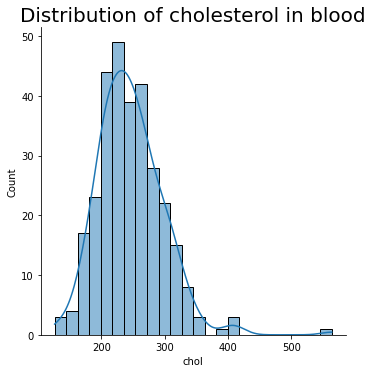

In [ ]:
sns.displot(data=df,x='chol',kde=True)
plt.title("Distribution of cholesterol in blood",fontsize=20)
plt.show()

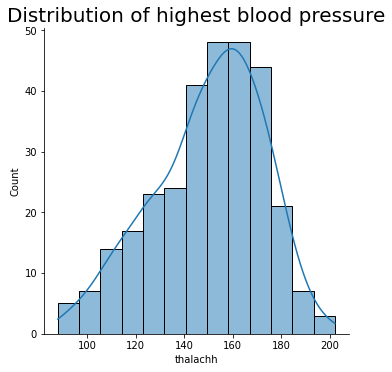

In [ ]:
sns.displot(data=df,x='thalachh',kde=True)
plt.title("Distribution of highest blood pressure",fontsize=20)
plt.show()

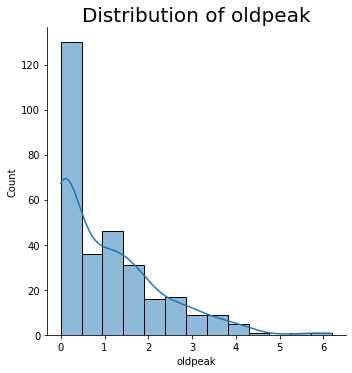

In [ ]:
sns.displot(data=df,x='oldpeak',kde=True)
plt.title("Distribution of oldpeak",fontsize=20)
plt.show()

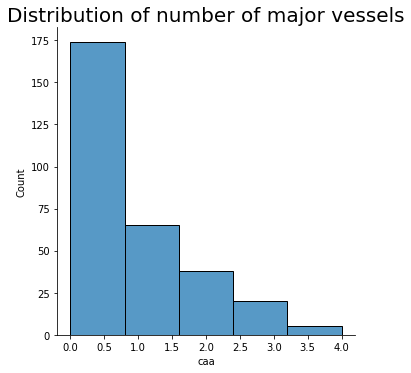

In [ ]:
sns.displot(data=df,x='caa',bins=5)
plt.title("Distribution of number of major vessels",fontsize=20)
plt.show()

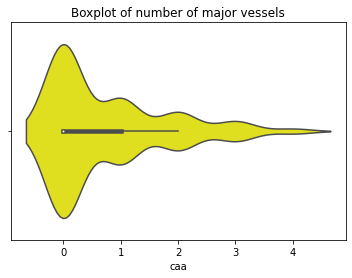

In [ ]:
sns.violinplot(data=df,x='caa',color='yellow')
plt.title("Boxplot of number of major vessels")
plt.show()

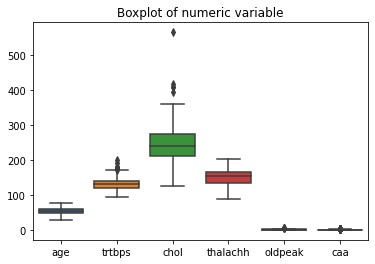

In [ ]:
sns.boxplot(data=df[numeric_list])
plt.title("Boxplot of numeric variable")
plt.show()

혈중 콜레스테롤 농도(chol), 심박수(trtbps), oldpeak, 주요혈관 갯수(caa)에 outlier 존재. 

outlier 제거 필요



### 범주형 변수 countplot

범주별 데이터가 unbalance 한가?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


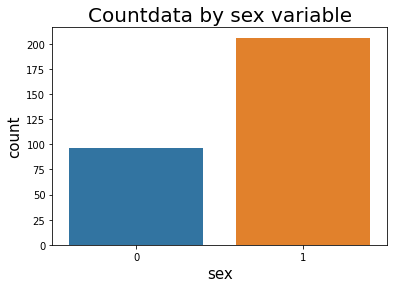

In [ ]:
sns.countplot(df['sex'])
plt.title('Countdata by sex variable',fontsize=20,)
plt.xlabel('sex',fontsize=15)
plt.ylabel('count',fontsize=15)
x_tick=[0,1]
sex_class=['female', 'male']
plt.xticks=(x_tick,sex_class)
plt.show()

sex=1(남성) 이 sex=0(여성)보다 두배정도 많음

다소 unbalanced 함.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


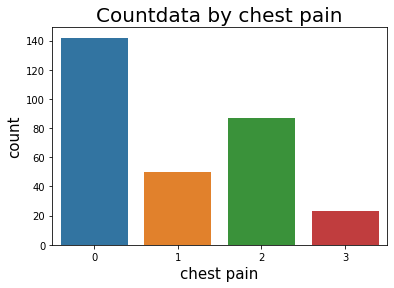

In [ ]:
sns.countplot(df['cp'])
plt.title('Countdata by chest pain',fontsize=20,)
plt.xlabel('chest pain',fontsize=15)
plt.ylabel('count',fontsize=15)
x_tick=[0,1,2]
cp_class=['typical angina', 'atypical angina','non-anginal pain','asymptomatic']
plt.xticks=(x_tick,cp_class)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


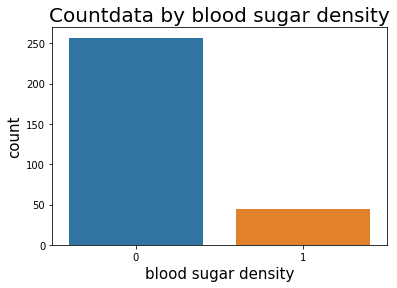

In [ ]:
sns.countplot(df['fbs'])
plt.title('Countdata by blood sugar density',fontsize=20,)
plt.xlabel('blood sugar density',fontsize=15)
plt.ylabel('count',fontsize=15)
x_tick=[0,1]
fbs_class=['above 120', 'lower 120']
plt.xticks=(x_tick,fbs_class)
plt.show()

다소 unbalanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


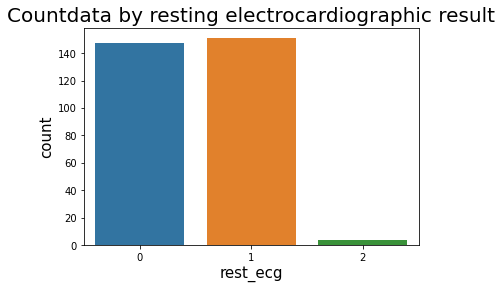

In [ ]:
sns.countplot(df['restecg'])
plt.title('Countdata by resting electrocardiographic result',fontsize=20,)
plt.xlabel('rest_ecg',fontsize=15)
plt.ylabel('count',fontsize=15)
x_tick=[0,1,2]
restecg_class=['normal', 'st-t wave normality','left ventricular hypertrophy']
plt.xticks=(x_tick,restecg_class)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


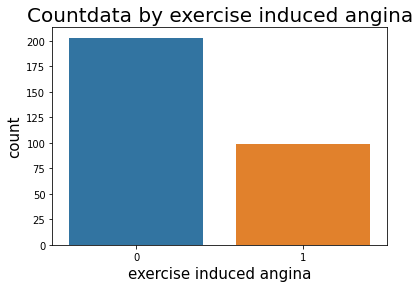

In [ ]:
sns.countplot(df['exng'])
plt.title('Countdata by exercise induced angina',fontsize=20,)
plt.xlabel('exercise induced angina',fontsize=15)
plt.ylabel('count',fontsize=15)
x_tick=[0,1]
exng_class=['no', 'yes']
plt.xticks=(x_tick,exng_class)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


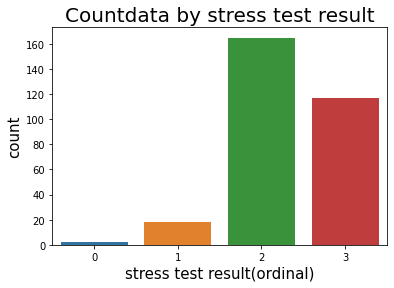

In [ ]:
sns.countplot(df['thall'])
plt.title('Countdata by stress test result',fontsize=20,)
plt.xlabel('stress test result(ordinal)',fontsize=15)
plt.ylabel('count',fontsize=15)
x_tick=[0,1,2,3]
thall_class=['0','1','2','3']
plt.xticks=(x_tick,thall_class)
plt.show()

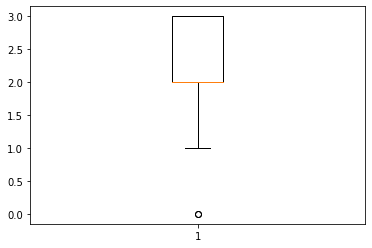

In [ ]:
plt.boxplot(df['thall'])
plt.show()

0 value는 outlier로 제거 필요

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


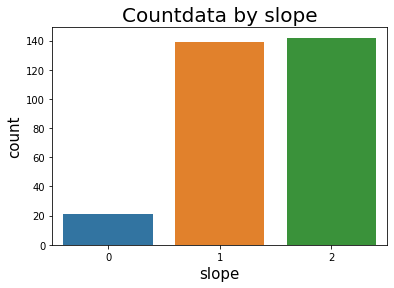

In [ ]:
sns.countplot(df['slp'])
plt.title('Countdata by slope',fontsize=20,)
plt.xlabel('slope',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

### distribution by output

* 범주형 변수의 output에 따른 분포

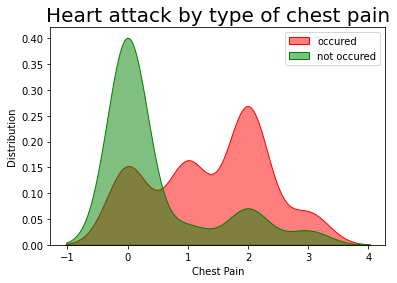

In [ ]:
sns.kdeplot(data=df,x='cp',hue='output',fill=True,alpha=0.5,palette=['green','red'])
plt.title('Heart attack by type of chest pain',fontsize=20)
plt.xlabel('Chest Pain',fontsize=10)
plt.ylabel('Distribution',fontsize=10)
plt.legend(loc='upper right',labels=['occured','not occured'])
plt.show()

Non-Anginal chest pain (cp=2)을 가진 사람이 심장마비가 잘 일어난다.

*Anginal pain: 협심증(심근에 혈액을 공급하는 관상동맥이 좁아져 갑작스런 흉부 통증을 느끼는 증상)

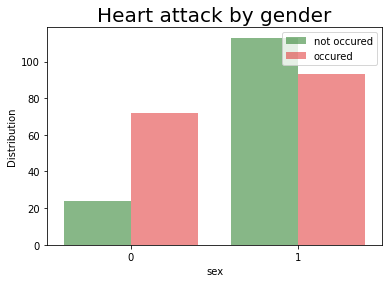

In [ ]:
sns.countplot(data=df,x='sex',hue='output',fill=True,alpha=0.5,palette=['green','red'])
plt.title('Heart attack by gender',fontsize=20)
plt.xlabel('sex',fontsize=10)
plt.ylabel('Distribution',fontsize=10)
plt.legend(loc='upper right',labels=['not occured','occured'])
plt.show()

남성(sex=1)이 심장마비가 잘 일어난다.

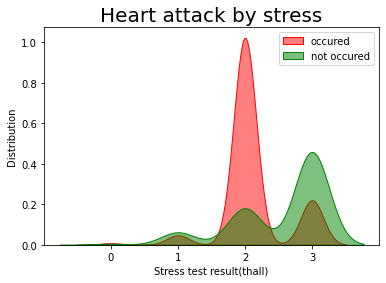

In [ ]:
sns.kdeplot(data=df,x='thall',hue='output',fill=True,alpha=0.5,palette=['green','red'])
plt.title('Heart attack by stress',fontsize=20)
plt.xlabel('Stress test result(thall)',fontsize=10)
plt.ylabel('Distribution',fontsize=10)
plt.legend(loc='upper right',labels=['occured','not occured'])
plt.show()

stress test result(0~3)가 2인 사람들이 심장마비가 잘 일어난다.

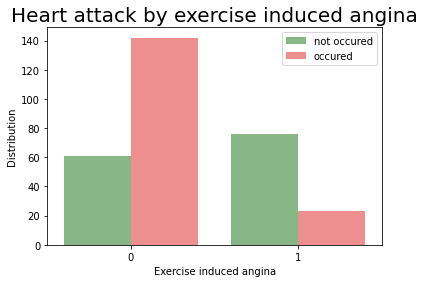

In [ ]:
sns.countplot(data=df,x='exng',hue='output',fill=True,alpha=0.5,palette=['green','red'])
plt.title('Heart attack by exercise induced angina',fontsize=20)
plt.xlabel('Exercise induced angina',fontsize=10)
plt.ylabel('Distribution',fontsize=10)
plt.legend(loc='upper right',labels=['not occured','occured'])
plt.show()

운동동반 협심증이 없었던(exng=0)사람들이 심장마비가 잘 일어난다.

* 수치형 변수의 output변수에 따른 분포

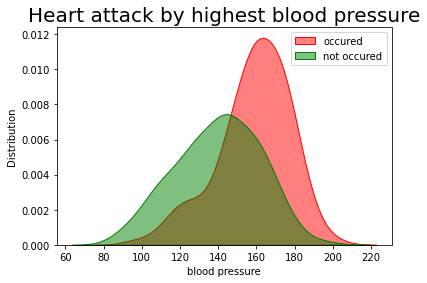

In [ ]:
sns.kdeplot(data=df,x='thalachh',hue='output',fill=True,alpha=0.5,palette=['green','red'])
plt.title('Heart attack by highest blood pressure',fontsize=20)
plt.xlabel('blood pressure',fontsize=10)
plt.ylabel('Distribution',fontsize=10)
plt.legend(loc='upper right',labels=['occured','not occured'])
plt.show()

최고 혈압이 높았던 사람들이 심장마비가 잘 일어난다.

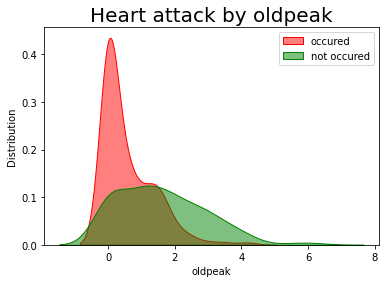

In [ ]:
sns.kdeplot(data=df,x='oldpeak',hue='output',fill=True,alpha=0.5,palette=['green','red'])
plt.title('Heart attack by oldpeak',fontsize=20)
plt.xlabel('oldpeak',fontsize=10)
plt.ylabel('Distribution',fontsize=10)
plt.legend(loc='upper right',labels=['occured','not occured'])
plt.show()

oldpeak가 적은 사람들이 심장마비가 잘 일어난다. (oldpeak에 대한 설명 필요)

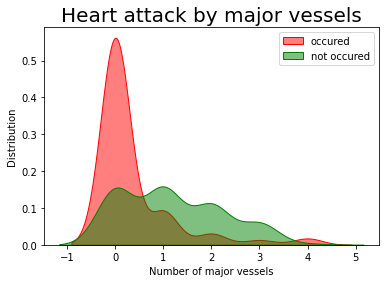

In [ ]:
sns.kdeplot(data=df,x='caa',hue='output',fill=True,alpha=0.5,palette=['green','red'])
plt.title('Heart attack by major vessels',fontsize=20)
plt.xlabel('Number of major vessels',fontsize=10)
plt.ylabel('Distribution',fontsize=10)
plt.legend(loc='upper right',labels=['occured','not occured'])
plt.show()

주요혈관 갯수가 0인 사람이 심장마비가 잘 일어난다.

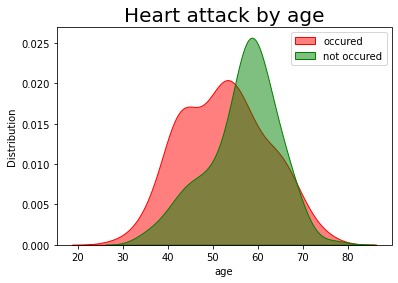

In [ ]:
sns.kdeplot(data=df,x='age',hue='output',fill=True,alpha=0.5,palette=['green','red'])
plt.title('Heart attack by age',fontsize=20)
plt.xlabel('age',fontsize=10)
plt.ylabel('Distribution',fontsize=10)
plt.legend(loc='upper right',labels=['occured','not occured'])
plt.show()

나이가 많을수록 심장마비가 자주 일어난다는 추측은 틀렸다.

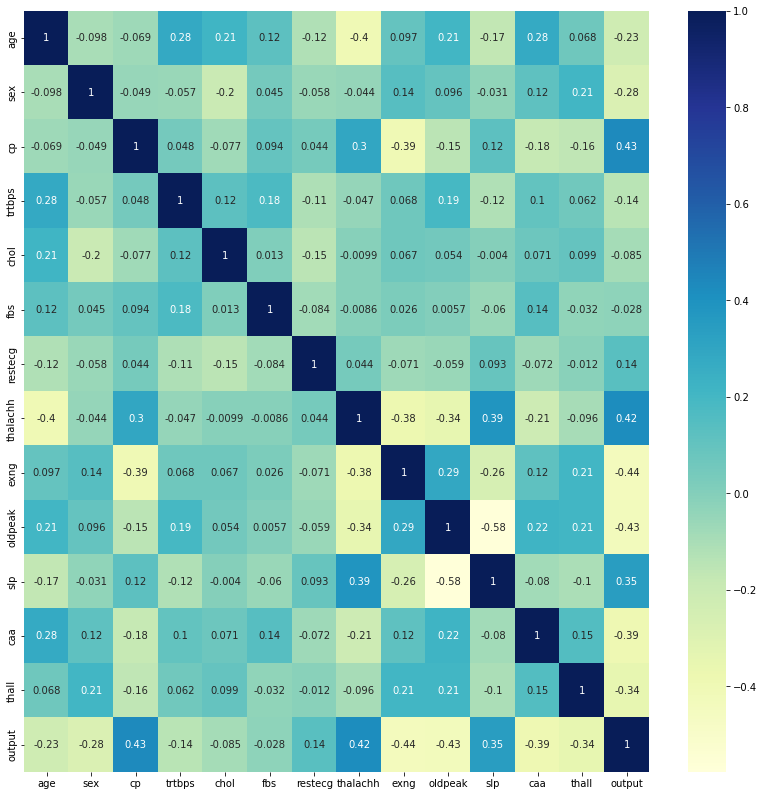

In [ ]:
correlations = df.corr()
plt.figure(figsize = (14, 14))
sns.heatmap(correlations, annot=True, cmap='YlGnBu')

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000




---



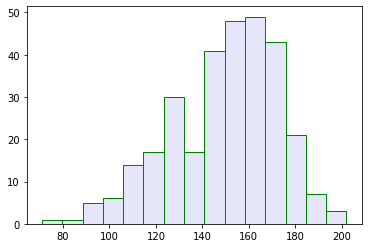

In [ ]:
plt.hist(df.thalachh, bins = 15, color = "lavender", ec="green")
plt.show()

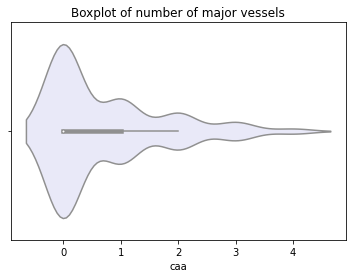

In [ ]:
sns.violinplot(data=df,x='caa',color='lavender')
plt.title("Boxplot of number of major vessels")
plt.show()

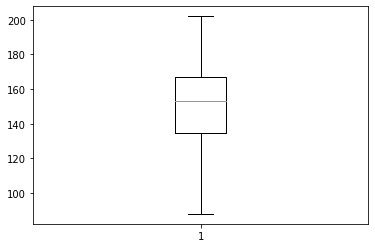

In [ ]:
# Creating plot
plt.boxplot(df.thalachh)
 
# show plot
plt.show()

In [ ]:
# df = df[df['thalachh'] > 80]  

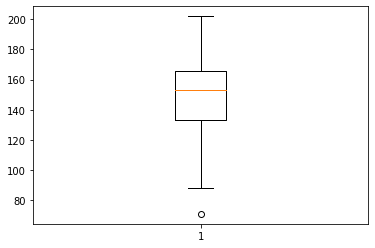

In [ ]:
# Creating plot
plt.boxplot(df.thalachh)
 
# show plot
plt.show()

In [ ]:
pd.cut(df.thalachh, bins=11, right=False).head()

0    [142.455, 154.364)
1    [178.182, 190.091)
2    [166.273, 178.182)
3    [166.273, 178.182)
4    [154.364, 166.273)
Name: thalachh, dtype: category
Categories (11, interval[float64, left]): [[71.0, 82.909) < [82.909, 94.818) < [94.818, 106.727) <
                                           [106.727, 118.636) ... [154.364, 166.273) <
                                           [166.273, 178.182) < [178.182, 190.091) <
                                           [190.091, 202.131)]

In [ ]:
# Outliner check & drop

numeric_list = ['age', 'trtbps', 'chol','thalachh', 'oldpeak']

threshold = 3
outlier = []
df_outline = df.copy()

for numeric_feature in numeric_list: 
  continue_col = df[numeric_feature]

  for i in df.index:
    #print(i)
    z = (df.iloc[i,:][numeric_feature] - np.mean(continue_col)) / np.std(continue_col)

    if np.abs(z) > threshold:
      # print(df.iloc[i,:][numeric_feature])
      df_outline = df_outline.drop(i, axis=0)
      
df = df_outline
df_outline.shape

(294, 14)

In [ ]:
trtbps = []
for i in df["trtbps"]:
    if i < 100:
        trtbps.append(1)
    elif i >= 100 and i <130 :
        trtbps.append(2)
    elif i >= 130 and i <160 :
        trtbps.append(3)
    elif i >= 160:
        trtbps.append(4)
df['trtbps'] = trtbps

# df.head()

In [ ]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall"] # all
# categorical_list = ['cp', 'thall',   'restecg', 'slp'] # 'restecg', 'slp'
# categorical_list = ['cp', 'thall'] 

numeric_list = ['age', 'trtbps', 'chol','thalachh', 'oldpeak']

df1 =df.copy()

df1 = pd.get_dummies(df1, columns = categorical_list)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,3,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,3,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,3,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,2,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,2,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
x = df1.drop(["output"], axis = 1) # feature data
y = df1['output'] # target

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[numeric_list] = sc.fit_transform(x[numeric_list])
x_new = x
x_new

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.969920,0.597948,-0.232573,0.004999,1.223393,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.888241,0.597948,0.138801,1.652914,2.340694,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.448524,0.597948,-0.866093,0.984840,0.385418,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.200415,-0.971666,-0.167037,1.252070,-0.173232,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.310345,-0.971666,2.410735,0.583996,-0.359449,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.310345,0.597948,-0.057809,-1.197533,-0.731883,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.008807,-0.971666,0.444638,-0.796689,0.199201,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.519566,0.597948,-1.106394,-0.395845,2.247586,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0.310345,0.597948,-2.460816,-1.553839,0.199201,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


## modeling

In [ ]:
from sklearn.model_selection import train_test_split

# import Algorithms
from sklearn.linear_model import LogisticRegression #1
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier #2
from sklearn.naive_bayes import GaussianNB #3
from sklearn.ensemble import RandomForestClassifier #4
from sklearn.svm import SVC #5


In [ ]:
#looping train_test_split: non_pca


def non_pca_iter(iter):
  i=0
  nonpca_lr_acc_score={}
  nonpca_dt_acc_score={}
  nonpca_nb_acc_score={}
  nonpca_rf_acc_score={}
  nonpca_lin_svc_acc_score={}

  while i<iter:
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.20)
    
    # 1) Logistic Regression
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    lr_predict = lr.predict(x_test)

    lr_conf_matrix = confusion_matrix(y_test, lr_predict)
    

    # 2) Decision Trees
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    dt_predict = dt.predict(x_test)

    dt_conf_matrix = confusion_matrix(y_test, dt_predict)


    # 3) Naive Bayes
    nb = GaussianNB()
    nb.fit(x_train,y_train)
    nb_predict=nb.predict(x_test)

    nb_conf_matrix = confusion_matrix(y_test, nb_predict)


    # 4) RandomForest Classifier
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    rf_predict=rf.predict(x_test)
    
    rf_conf_matrix = confusion_matrix(y_test, rf_predict)


    # 5) SVM Classifier
    lin_svc = SVC()
    lin_svc.fit(x_train, y_train)
    lin_svc_predict=lin_svc.predict(x_test)
    
    lin_svc_conf_matrix = confusion_matrix(y_test, lin_svc_predict)

    # 딕셔너리 score 할당
    nonpca_lr_acc_score[i] = accuracy_score(y_test, lr_predict)
    nonpca_dt_acc_score[i] = accuracy_score(y_test, dt_predict)
    nonpca_nb_acc_score[i] = accuracy_score(y_test, nb_predict)
    nonpca_rf_acc_score[i] = accuracy_score(y_test, rf_predict)
    nonpca_lin_svc_acc_score[i] = accuracy_score(y_test, lin_svc_predict)
    i+=1
  
  lr_sim=pd.DataFrame(nonpca_lr_acc_score,index=[0])
  lr_sum=lr_sim.sum(axis=1) # 행 방향 합계
  dt_sim=pd.DataFrame(nonpca_dt_acc_score,index=[0])
  dt_sum=dt_sim.sum(axis=1)
  nb_sim=pd.DataFrame(nonpca_nb_acc_score,index=[0])
  nb_sum=nb_sim.sum(axis=1)  
  rf_sim=pd.DataFrame(nonpca_rf_acc_score,index=[0])
  rf_sum=rf_sim.sum(axis=1)  
  lin_svc_sim=pd.DataFrame(nonpca_lin_svc_acc_score,index=[0])
  lin_svc_sum=lin_svc_sim.sum(axis=1)

  lr_mean=lr_sum/iter
  dt_mean=dt_sum/iter
  nb_mean=nb_sum/iter
  rf_mean=rf_sum/iter
  lin_svc_mean=lin_svc_sum/iter
  

  return [iter, lr_mean.values[0], dt_mean.values[0] ,nb_mean.values[0],rf_mean.values[0],lin_svc_mean.values[0]]

 # print("number of iteration :",iter)
 # print("Logistic Regression :",lr_mean.values[0] )
 # print("Decision Trees :", dt_mean.values[0] )
 # print("NaiveBayes :",nb_mean.values[0] )
 # print("RandomForest classifier :",rf_mean.values[0] )
 # print("SVM Classifier :",lin_svc_mean.values[0] )

In [ ]:
non_pca_iter(2)

[2,
 0.8305084745762712,
 0.7457627118644068,
 0.847457627118644,
 0.8220338983050848,
 0.8050847457627119]

In [ ]:
# Original data, Simulation, 알고리즘별 accuracy, iter=100
non_pca_iter(100)

[100,
 0.8455932203389831,
 0.7486440677966101,
 0.7854237288135593,
 0.8328813559322031,
 0.8366101694915254]

In [ ]:
#looping train_test_split: pca
from sklearn.decomposition import PCA

def pca_iter(iter):
  i=0
  pca_lr_acc_score={}
  pca_dt_acc_score={}
  pca_nb_acc_score={}
  pca_rf_acc_score={}
  pca_lin_svc_acc_score={}

  pca=PCA()
  pca_new=PCA(n_components=13)
  x_pca13=pca_new.fit_transform(x) # PCA 전처리

  while i<iter:

    x_train, x_test, y_train, y_test = train_test_split(x_pca13, y, test_size = 0.20)

    # 1) Logistic Regression
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    lr_predict = lr.predict(x_test)

    lr_conf_matrix = confusion_matrix(y_test, lr_predict)
    

    # 2) Decision Trees
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    dt_predict = dt.predict(x_test)

    dt_conf_matrix = confusion_matrix(y_test, dt_predict)


    # 3) Naive Bayes
    nb = GaussianNB()
    nb.fit(x_train,y_train)
    nb_predict=nb.predict(x_test)

    nb_conf_matrix = confusion_matrix(y_test, nb_predict)


    # 4) RandomForest Classifier
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    rf_predict=rf.predict(x_test)
    
    rf_conf_matrix = confusion_matrix(y_test, rf_predict)


    # 5) SVM Classifier
    lin_svc = SVC()
    lin_svc.fit(x_train, y_train)
    lin_svc_predict=lin_svc.predict(x_test)
    
    lin_svc_conf_matrix = confusion_matrix(y_test, lin_svc_predict)

    # 딕셔너리 score 할당
    pca_lr_acc_score[i] = accuracy_score(y_test, lr_predict)
    pca_dt_acc_score[i] = accuracy_score(y_test, dt_predict)
    pca_nb_acc_score[i] = accuracy_score(y_test, nb_predict)
    pca_rf_acc_score[i] = accuracy_score(y_test, rf_predict)
    pca_lin_svc_acc_score[i] = accuracy_score(y_test, lin_svc_predict)
    i+=1
  
  lr_sim=pd.DataFrame(pca_lr_acc_score,index=[0])
  lr_sum=lr_sim.sum(axis=1) # 행 방향 합계
  dt_sim=pd.DataFrame(pca_dt_acc_score,index=[0])
  dt_sum=dt_sim.sum(axis=1)
  nb_sim=pd.DataFrame(pca_nb_acc_score,index=[0])
  nb_sum=nb_sim.sum(axis=1)  
  rf_sim=pd.DataFrame(pca_rf_acc_score,index=[0])
  rf_sum=rf_sim.sum(axis=1)  
  lin_svc_sim=pd.DataFrame(pca_lin_svc_acc_score,index=[0])
  lin_svc_sum=lin_svc_sim.sum(axis=1)

  lr_mean=lr_sum/iter
  dt_mean=dt_sum/iter
  nb_mean=nb_sum/iter
  rf_mean=rf_sum/iter
  lin_svc_mean=lin_svc_sum/iter
  
  return [iter,lr_mean.values[0], dt_mean.values[0] ,nb_mean.values[0],rf_mean.values[0],lin_svc_mean.values[0]]

 # print("number of iteration :",iter)
 # print("Logistic Regression :",lr_mean.values[0] )
 # print("Decision Trees :", dt_mean.values[0] )
 # print("NaiveBayes :",nb_mean.values[0] )
 # print("RandomForest classifier :",rf_mean.values[0] )
 # print("SVM Classifier :",lin_svc_mean.values[0] )

In [ ]:
pca_iter(2)

[2,
 0.847457627118644,
 0.6949152542372881,
 0.7542372881355932,
 0.7542372881355932,
 0.8389830508474576]

In [ ]:
# PCA data, Simulation, 알고리즘별 accuracy, iter=100
pca_iter(100)

[100,
 0.8491525423728815,
 0.7540677966101695,
 0.813050847457627,
 0.8023728813559322,
 0.8327118644067797]

In [ ]:
print(non_pca_iter(1000),pca_iter(1000))


[1000, 0.8389152542372881, 0.7444406779661017, 0.7753898305084747, 0.8230169491525423, 0.8294406779661017] [1000, 0.8493220338983051, 0.740406779661017, 0.8171016949152542, 0.7989830508474577, 0.8373220338983051]


대략적인 결론:

Logistic Regression이 성능이 제일 좋음

Overfitting방지를 위한 PCA적용 결과 Logistic Regression > SVM Classifier(linear kernel) > Naive Bayes > RandomForest Classifier > Decision Trees 순으로 성능이 좋음

PCA를 적용했을때 대부분 성능이 개선되었음. 특히 Naive Bayes의 경우 성능이 6.2%나 개선되었음. 그러나 RandomForest Classifier의 경우 성능이 3.3% 감소하였음. PCA는 알고리즘별로 성능을 개선하기도 하고 감소시키기도 함.

다중공선성 제거를 위해 PCA 적용한 결과, PCA적용한 Logistic Regression 이 PCA적용하지 않은 original data보다 1%정도 성능이 개선되었음.

이로써 PCA를 통해 Overfitting방지와, 성능 개선 두마리 토끼를 잡을 수 있었음.

Simulation결과 심장마비 예측을 위해서는 PCA전처리를 한 로지스틱 회귀분석 알고리즘이 정확도 85%로 제일 정확도가 높게 나왔음. 



---



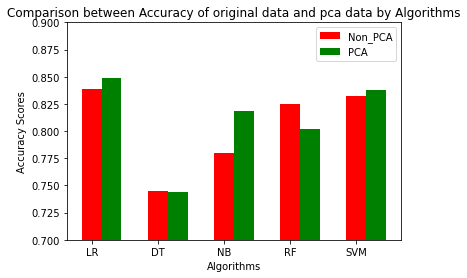

In [ ]:
# 알고리즘별 iter=1000 최종 결과

import matplotlib.pyplot as plt
import numpy as np

non_pca_1000_list=non_pca_iter(1000)
yes_pca_1000_list=pca_iter(1000)
non_pca_iter_1000=[non_pca_1000_list[1],non_pca_1000_list[2],non_pca_1000_list[3],non_pca_1000_list[4],non_pca_1000_list[5]]
yes_pca_iter_1000=[yes_pca_1000_list[1],yes_pca_1000_list[2],yes_pca_1000_list[3],yes_pca_1000_list[4],yes_pca_1000_list[5]]
algorithms=['LR','DT','NB','RF','SVM']


x_range = np.arange(len(algorithms))
plt.bar(x_range, non_pca_iter_1000, color='red', width=0.3,label='Non_PCA')
plt.bar(x_range + 0.3,yes_pca_iter_1000, color='green', width=0.3,label='PCA')
plt.xlabel("Algorithms")
x_tick=[0,1,2,3,4]
plt.xticks(x_tick,algorithms)
plt.ylabel("Accuracy Scores")
plt.title("Comparison between Accuracy of original data and pca data by Algorithms")
plt.ylim([0.7,0.9])
plt.legend(loc='best')
plt.show()




In [ ]:
# iteration별 수렴 정도_1(non_pca_LR)

def non_pca_iter_1(iter):
  i=0
  nonpca_lr_acc_score={}

  while i<iter:
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.20)
    
    # 1) Logistic Regression
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    lr_predict = lr.predict(x_test)

    lr_conf_matrix = confusion_matrix(y_test, lr_predict)

    nonpca_lr_acc_score[i] = accuracy_score(y_test, lr_predict)
    i+=1
  
    lr_sim=pd.DataFrame(nonpca_lr_acc_score,index=[0])
    lr_sum=lr_sim.sum(axis=1) # 행 방향 합계

    lr_mean=lr_sum/iter
  
  return [lr_mean.values[0]]

In [ ]:
# iteration별 수렴 정도_1(pca_LR)

def pca_iter_1(iter):
  i=0
  pca_lr_acc_score={}

  pca=PCA()
  pca_new=PCA(n_components=13)
  x_pca13=pca_new.fit_transform(x) # PCA 전처리

  while i<iter:
    x_train, x_test, y_train, y_test = train_test_split(x_pca13, y, test_size = 0.20)
    
    # 1) Logistic Regression
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    lr_predict = lr.predict(x_test)

    lr_conf_matrix = confusion_matrix(y_test, lr_predict)

    pca_lr_acc_score[i] = accuracy_score(y_test, lr_predict)
    i+=1
  
    lr_sim=pd.DataFrame(pca_lr_acc_score,index=[0])
    lr_sum=lr_sim.sum(axis=1) # 행 방향 합계

    lr_mean=lr_sum/iter
  
  return [lr_mean.values[0]]

In [ ]:
non_pca_1_list=[]
for i in range(1,201):
  non_pca_1_list.append(non_pca_iter_1(i))

In [ ]:
pca_1_list=[]
for i in range(1,201):
  pca_1_list.append(pca_iter_1(i))

In [ ]:
iter200=list(range(1,201))

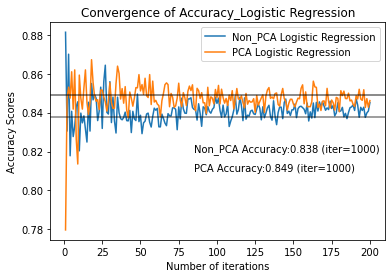

In [ ]:
plt.plot(iter200,non_pca_1_list,label='Non_PCA Logistic Regression')
plt.plot(iter200,pca_1_list,label='PCA Logistic Regression')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy Scores')
plt.title('Convergence of Accuracy_Logistic Regression')
plt.legend(loc='best',ncol=1)
plt.axhline(y=0.838,alpha=0.5,color='black')
plt.text(85,0.82,'Non_PCA Accuracy:0.838 (iter=1000)')
plt.axhline(y=0.849,alpha=0.6,color='black')
plt.text(85,0.81,'PCA Accuracy:0.849 (iter=1000)')
plt.show()


설명:

**iteration쓰는 이유:성능 비교 위해**

* 각 알고리즘별 PCA이전과 PCA이후의 성능비교를 하려면 동일한 train/test set을 가지고 비교해야 한다. 그러나 train_test_split 메소드는 train set과 test set을 랜덤하게 스플릿하기 때문에, train_test_split 메소드 이전에 PCA를 해야하는 PCA의 전처리적인 성격 때문에 original data와 pca이후의 train/test set이 다르다는 문제가 생긴다. 

* 따라서 성능 비교를 위해 train/test set을 여러개 만들어서, 각각 set마다 알고리즘별로 나온 성능을 평균값을 내어 수렴하는 근사치를 비교하는 방법을 사용했음.

**해당 그림 설명**

* 해당 Accuracy Scores는 각 iteration number별 accuracy score가 아니라, 각 iteration number까지 누적된 성능들의 평균값이다.

* 누적된 성능들의 평균값은 iteration수가 많아질수록 분산이 줄어들며 어떤 특정한 값에 수렴하는 것처럼 보인다.

* 로지스틱 회귀분석의 경우 PCA로 전처리한 데이터가 PCA하지 않은 데이터보다 정확도에 있어서 성능이 더 좋다.



### PCA, Scree plot

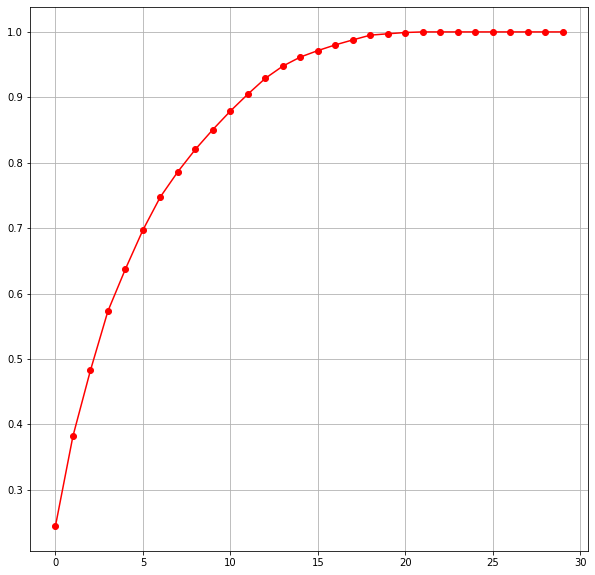

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca=pca.fit_transform(x)
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

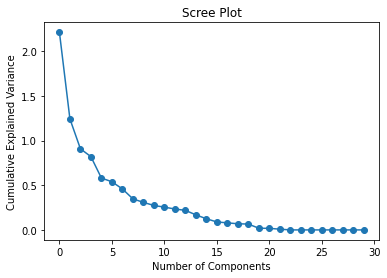

In [ ]:
#Scree plot
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_,'o-')

### 기존 PCA 코드(사용X)

In [ ]:
pca_new=PCA(n_components=12)
x_new=pca_new.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.20)
#1 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[23  4]
 [ 2 32]]
90.1639344262295


In [ ]:
#2 Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[18  9]
 [10 24]]
68.85245901639344


In [ ]:
#3 NaiveBayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[23  4]
 [ 3 31]]
88.52459016393442


In [ ]:
#4 RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[22  5]
 [ 3 31]]
86.88524590163934


In [ ]:
#5 SVM Classifier
from sklearn.svm import SVC
#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[22  5]
 [ 3 31]]
86.88524590163934


In [ ]:
print("Logistic Regression :",lr_acc_score )
print("Decision Trees :",dt_acc_score )
print("NaiveBayes :",nb_acc_score )
print("RandomForest classifier :",rf_acc_score )
print("SVM Classifier :",lin_svc_acc_score )

Logistic Regression : 0.9016393442622951
Decision Trees : 0.6885245901639344
NaiveBayes : 0.8852459016393442
RandomForest classifier : 0.8688524590163934
SVM Classifier : 0.8688524590163934


1. 재코딩 필요한 변수 재코딩 / 범주형 한명씩 코딩 해서 톡방에 공유. 
2. 시각화 변수 정하고, 만드는 것 / 변수 정하기 -> 사다리 타기,,  
3. PCA
4. 모델링 후 결과 보고
주말까지 (14일) 
양식 간단하게 만들어서 
논의할 점 // 회의할 점 
--------------------------------------------------------------------------------
5. 최종 결과 만들고
6. ppt랑 발표 